## 1. Importing Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

-   `numpy`: Used for numerical computations (matrix operations, random initialization, etc.).
-   `pandas`: Used to read the MNIST dataset from a CSV file.
-   `matplotlib.pyplot`: Used for visualizing handwritten digits from the dataset.

In [3]:
# Load the dataset
# MNIST dataset should be stored in 'MNIST_Dataset.csv'
data = pd.read_csv('MNIST_Dataset.csv')

-   Reads the MNIST dataset from a CSV file.
-   Converts the dataset into a NumPy array for efficient numerical processing.
-   Stores the number of rows (`m`, representing total samples) and columns (`n`, representing 1 label + 784 pixel values per sample).


In [4]:
# Convert pandas DataFrame to numpy array
data = np.array(data)
m, n = data.shape  # Get the number of rows (m) and columns (n)

In [24]:
print(m,n)

42000 785


In [25]:
# Shuffle the dataset to ensure randomness before splitting
np.random.shuffle(data)

# Randomly shuffles the dataset to ensure the model doesn't learn patterns based on order.

In [6]:
# Split into development (dev) and training sets
# First 1000 examples for development/testing
data_dev = data[0:1000].T  # Transpose for better data handling
Y_dev = data_dev[0]  # Labels
X_dev = data_dev[1:n]  # Features
X_dev = X_dev / 255.  # Normalize pixel values (0-255) to (0-1)


'''
The first 1000 samples are assigned to the development (dev) set.
Y_dev stores labels (0-9 digits).
X_dev stores pixel data and is normalized to keep values between 0 and 1.
'''

'\nThe first 1000 samples are assigned to the development (dev) set.\nY_dev stores labels (0-9 digits).\nX_dev stores pixel data and is normalized to keep values between 0 and 1.\n'

In [30]:
# Remaining data for training
data_train = data[1000:m].T  # Transpose
Y_train = data_train[0]  # Labels
X_train = data_train[1:n]  # Features
X_train = X_train / 255.  # Normalize
_, m_train = X_train.shape  # Get number of training examples

'''
The remaining samples are assigned to the training set.
m_train stores the number of training samples.
'''

'\nThe remaining samples are assigned to the training set.\nm_train stores the number of training samples.\n'

### Initializing Neural Network Parameters

In [8]:
# Initialize parameters (weights and biases) for a 2-layer neural network
def init_params():
    W1 = np.random.rand(10, 784) - 0.5  # Weights for layer 1
    b1 = np.random.rand(10, 1) - 0.5  # Biases for layer 1
    W2 = np.random.rand(10, 10) - 0.5  # Weights for layer 2
    b2 = np.random.rand(10, 1) - 0.5  # Biases for layer 2
    return W1, b1, W2, b2

-   Initializes weights (`W1`, `W2`) and biases (`b1`, `b2`) with random values.
-   Layer 1: 10 neurons, input size 784 (28×28 pixels).
-   Layer 2: 10 neurons (output layer for 10 classes, digits 0-9).
---


In [9]:
# Activation function: ReLU (Rectified Linear Unit)
def ReLU(Z):
    return np.maximum(Z, 0)

In [33]:
# Activation function: Softmax (for multi-class classification)
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

# Converts outputs into probabilities by normalizing exponentiated values.

In [34]:
# Forward propagation: Computes activations through the network
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1  # Linear transformation for first layer
    A1 = ReLU(Z1)  # Activation using ReLU
    Z2 = W2.dot(A1) + b2  # Linear transformation for second layer
    A2 = softmax(Z2)  # Output probabilities using softmax
    return Z1, A1, Z2, A2

-   **Layer 1**:
    -   `Z1 = W1.dot(X) + b1` (Linear transformation).
    -   `A1 = ReLU(Z1)` (Activation function).
-   **Layer 2**:
    -   `Z2 = W2.dot(A1) + b2` (Linear transformation).
    -   `A2 = softmax(Z2)` (Convert to probability distribution).
---

In [35]:
# Derivative of ReLU function
def ReLU_deriv(Z):
    return Z > 0  # Returns 1 if Z > 0, otherwise 0

In [13]:
# Convert labels into one-hot encoding
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y.T

# Converts digit labels into one-hot encoded vectors.

In [14]:
# Backpropagation: Compute gradients to update parameters
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)  # Convert labels to one-hot representation
    dZ2 = A2 - one_hot_Y  # Error at output layer
    dW2 = 1 / m_train * dZ2.dot(A1.T)  # Gradient for W2
    db2 = 1 / m_train * np.sum(dZ2, axis=1, keepdims=True)  # Gradient for b2
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)  # Error at hidden layer
    dW1 = 1 / m_train * dZ1.dot(X.T)  # Gradient for W1
    db1 = 1 / m_train * np.sum(dZ1, axis=1, keepdims=True)  # Gradient for b1
    return dW1, db1, dW2, db2

# Computes gradients (dW1, db1, dW2, db2) for parameter updates.

In [15]:
# Update parameters using gradient descent
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [16]:
# Predict the class label based on probabilities
def get_predictions(A2):
    return np.argmax(A2, axis=0)

In [17]:
# Compute accuracy of the model
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [18]:
# Training loop using gradient descent
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()  # Initialize weights and biases
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)  # Forward pass
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)  # Backward pass
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)  # Update parameters
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [19]:
# Function to make predictions
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    return get_predictions(A2)

In [20]:
# Function to test predictions on a single example
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]  # Select a single image
    prediction = make_predictions(current_image, W1, b1, W2, b2)  # Get prediction
    label = Y_train[index]  # Get actual label
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255  # Reshape to 28x28 pixels
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

In [ ]:
# Train the model with learning rate 0.1 and 500 iterations/epochs
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[6 7 2 ... 2 2 2] [6 7 4 ... 8 3 6]
0.1034390243902439
Iteration:  10
[6 9 2 ... 3 4 6] [6 7 4 ... 8 3 6]
0.18792682926829268
Iteration:  20
[6 9 1 ... 3 4 6] [6 7 4 ... 8 3 6]
0.25695121951219513
Iteration:  30
[6 9 1 ... 0 4 6] [6 7 4 ... 8 3 6]
0.30453658536585365
Iteration:  40
[6 9 4 ... 9 4 6] [6 7 4 ... 8 3 6]
0.34704878048780485
Iteration:  50
[6 9 4 ... 9 4 6] [6 7 4 ... 8 3 6]
0.38402439024390245
Iteration:  60
[6 7 4 ... 9 4 6] [6 7 4 ... 8 3 6]
0.41941463414634145
Iteration:  70
[6 7 4 ... 7 4 6] [6 7 4 ... 8 3 6]
0.45351219512195123
Iteration:  80
[6 7 4 ... 7 4 2] [6 7 4 ... 8 3 6]
0.4855853658536585
Iteration:  90
[6 7 4 ... 8 4 2] [6 7 4 ... 8 3 6]
0.5178780487804878
Iteration:  100
[3 7 4 ... 8 4 2] [6 7 4 ... 8 3 6]
0.5490487804878049
Iteration:  110
[3 7 4 ... 8 4 2] [6 7 4 ... 8 3 6]
0.5796097560975609
Iteration:  120
[3 7 4 ... 8 4 2] [6 7 4 ... 8 3 6]
0.6026829268292683
Iteration:  130
[3 7 4 ... 8 5 6] [6 7 4 ... 8 3 6]
0.6254878048780488
Iteration:

Prediction:  [1]
Label:  1


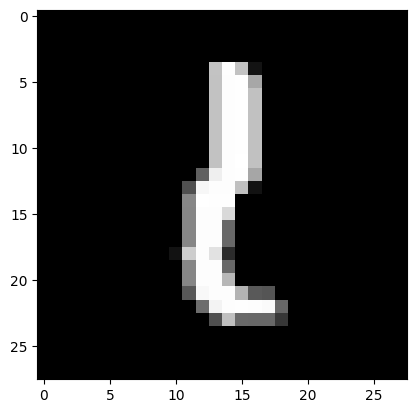

In [37]:
# Test model predictions
test_prediction(256, W1, b1, W2, b2)
# test_prediction(1, W1, b1, W2, b2)
# test_prediction(2, W1, b1, W2, b2)
# test_prediction(3, W1, b1, W2, b2)

In [23]:
# Evaluate accuracy on development set
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
print("Dev Set Accuracy:", get_accuracy(dev_predictions, Y_dev))

[5 4 8 9 9 7 5 4 5 3 6 5 8 0 3 9 4 3 2 9 0 0 7 3 5 0 8 2 1 5 9 2 5 9 1 2 3
 2 7 3 0 7 3 3 4 6 6 4 2 3 9 0 3 3 0 6 5 0 0 0 0 1 8 0 1 4 2 4 9 3 2 6 0 3
 6 6 5 0 4 9 7 0 9 3 9 9 9 6 5 5 0 2 1 3 5 6 7 6 5 8 3 7 7 7 0 1 5 4 4 6 0
 8 4 3 8 7 8 9 4 6 8 5 2 1 4 2 9 6 4 7 9 2 1 1 3 0 9 1 2 3 0 7 2 4 8 6 5 8
 5 4 6 1 8 3 8 7 6 2 4 5 9 6 9 8 0 7 7 2 7 7 3 6 8 4 0 0 0 7 5 9 0 1 1 0 6
 0 4 8 5 9 3 0 7 8 2 3 9 1 3 3 3 1 5 3 3 0 2 9 1 2 4 6 3 1 6 0 9 8 4 2 7 7
 5 0 9 8 7 2 8 6 5 2 8 4 6 8 7 6 7 1 0 6 6 9 6 2 4 5 4 7 7 1 3 5 3 1 0 0 8
 9 9 5 9 9 6 4 7 5 5 3 1 9 7 8 1 4 4 7 4 5 7 3 7 9 2 1 1 3 0 6 8 3 9 7 8 7
 4 2 7 8 9 5 6 0 1 7 9 8 0 2 1 0 5 6 8 2 3 9 6 9 6 8 2 6 5 8 6 2 4 5 8 0 3
 5 8 5 3 7 3 8 3 3 2 7 8 8 4 3 4 4 4 6 5 4 3 3 1 5 5 9 6 2 6 1 4 4 3 1 4 9
 9 3 5 3 3 9 8 5 2 3 5 3 5 4 4 1 2 7 6 4 9 9 4 3 0 1 6 8 8 9 1 7 8 1 1 8 9
 5 2 3 9 9 2 4 3 6 4 7 5 4 0 2 7 3 7 3 6 1 1 9 8 7 7 7 1 9 4 4 5 6 1 3 4 5
 3 7 0 2 1 1 0 0 1 5 5 2 4 0 9 1 9 7 3 7 0 6 7 8 2 3 6 6 3 9 2 5 1 6 6 2 8
 8 3 0 2 6 1 7 1 5 4 3 1 

## **Summary**

-   A **2-layer neural network** trained on MNIST.
-   Uses **ReLU & softmax** activations.
-   Uses **gradient descent** to update weights.
-   Can classify **handwritten digits (0-9)**.
---